###Importando bibliotecas e carregando os dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Carregando os dados
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')

In [ ]:
#Verificando as primeiras linhas
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [ ]:
#Verificar valores ausentes
df.isnull().sum()

,0
show_id,0
title,0
director,1901
cast,556
country,427
date_added,642
release_year,0
rating,10
duration,0
listed_in,0


In [ ]:
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [ ]:
df.shape

(5837, 12)

###Limpeza e pré-processamento

In [ ]:
#Remover os valores nulos das colunas rating e duration
df.dropna(subset=['rating', 'duration'], inplace=True)

In [ ]:
#Substituir os valores nulos das colunas diretor por desconhecido
df['director'].fillna('Desconhecido', inplace=True)

<ipython-input-10-dc0dedfebfdc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Desconhecido', inplace=True)


###Análise Exploratória dos Dados (EDA)

<ipython-input-11-902af0814c0c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="pastel")


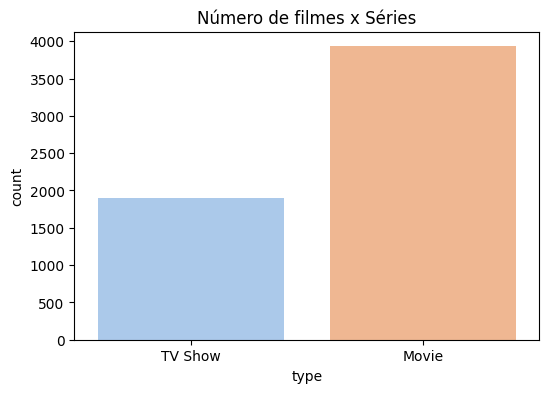

In [ ]:
###Número de filmes x Séries
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="pastel")
plt.title('Número de filmes x Séries')
plt.show()

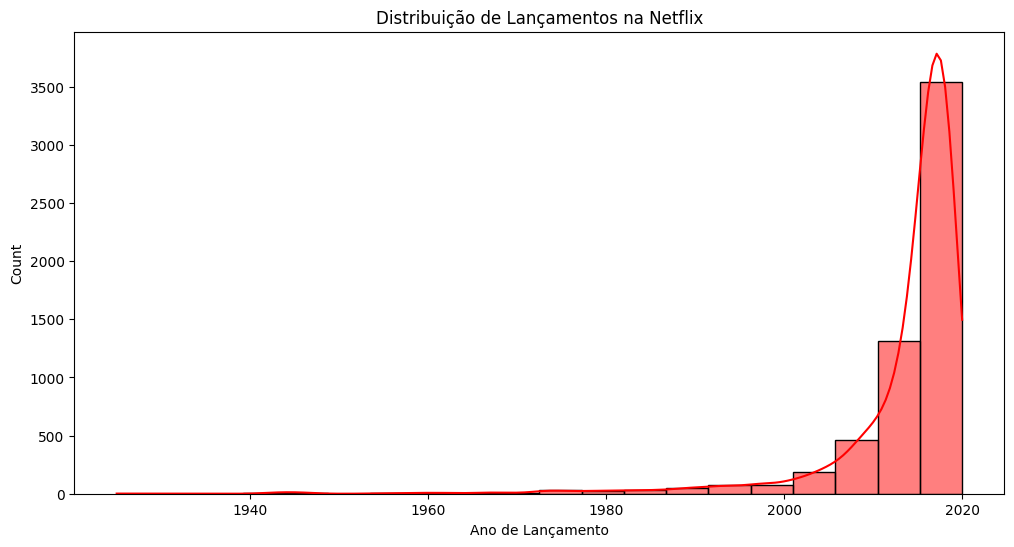

In [ ]:
#Quantidade de lançamento por ano
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=20, kde=True, color='red')
plt.title('Distribuição de Lançamentos na Netflix')
plt.xlabel('Ano de Lançamento')
plt.show()

<ipython-input-13-ca51efe507ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.index, y=top_paises.values, palette='Blues_r')


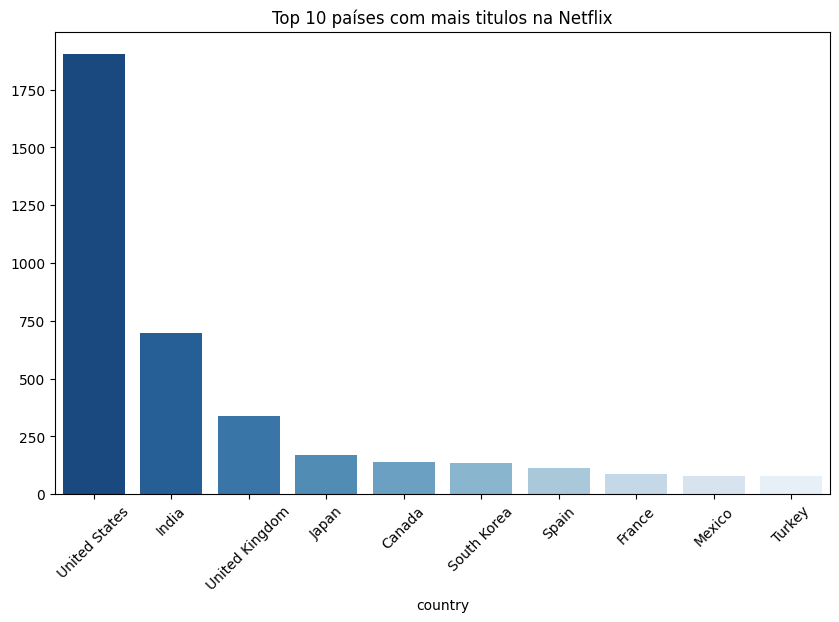

In [ ]:
#Top 10 países com mais títulos na Netflix
top_paises = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_paises.index, y=top_paises.values, palette='Blues_r')
plt.xticks(rotation=45)
plt.title("Top 10 países com mais titulos na Netflix")
plt.show()

In [ ]:
from collections import Counter

<ipython-input-16-956790857dce>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_generos['Quantidade'], y=df_generos['Gênero'], palette='viridis')


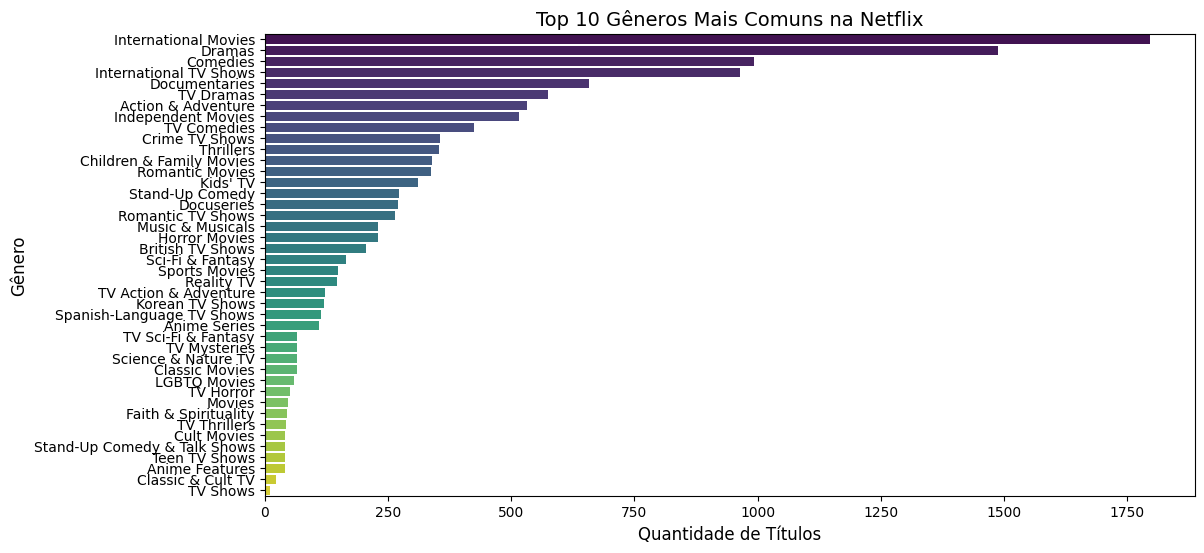

In [ ]:
#Separar os generos e contar a frequência de cada um
generos = df['listed_in'].dropna().str.split(', ')
todos_generos = [genero for lista in generos for genero in lista]

#Contar a frequencia dos generos
contagem_generos = Counter(todos_generos)

#Obter os 10 generos mais comuns
df_generos =  pd.DataFrame(contagem_generos.items(), columns=['Gênero', 'Quantidade'])
#Ordena de forma decrescente
df_generos = df_generos.sort_values(by='Quantidade', ascending=False)

#Criar o gráfico de barras na horizontal
plt.figure(figsize=(12,6))
sns.barplot(x=df_generos['Quantidade'], y=df_generos['Gênero'], palette='viridis')
plt.xlabel('Quantidade de Títulos', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.title('Top 10 Gêneros Mais Comuns na Netflix', fontsize=14)
plt.show()